In [1]:
import matplotlib
#matplotlib.use('Qt4Agg')
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

In [2]:
#%matplotlib qt
#import hyperspy.api as hs
import numpy as np
import os
import h5py

In [3]:
# Reading the data

In [4]:
file = r'/dls/e02/data/2020/cm26481-1/processing/pty_simulated_data_MD/80kV_graphene_hole/graphene_small_hole_10mrad_zero_def/graphene_small_hole_10mrad_zero_def.h5'
#file = '/dls/science/groups/e02/Mohsen/code/sim_4DSTEM/bilayer_no_defects/conv_20mrad/conv_20mrad.h5'
hf = h5py.File(file, 'r')
data = hf.get('4DSTEM_simulation/data/datacubes/CBED_array_depth0000/datacube')
d = np.array(data)

In [44]:
print(hf['4DSTEM_simulation']['metadata']['metadata_0'].keys())

[u'calibration', u'comments', u'microscope', u'original', u'sample', u'user']


In [5]:
test = hf['4DSTEM_simulation']['data']['realslices']['DPC_CoM_depth0000']['realslice'][:]

In [24]:
CoM_x = test[:,:,0]
CoM_y = test[:,:,1]

In [29]:
CoM_x

array([[ 0.00076329,  0.00106544,  0.00131716, ...,  0.00017273,
         0.00044777,  0.00075846],
       [-0.00015343,  0.00025917,  0.00061912, ..., -0.0009298 ,
        -0.00057207, -0.0001599 ],
       [-0.00105586, -0.00056496, -0.00012476, ..., -0.00195594,
        -0.0015446 , -0.00106349],
       ..., 
       [ 0.00249248,  0.00239426,  0.00227389, ...,  0.00262338,
         0.00256851,  0.0024938 ],
       [ 0.0021076 ,  0.00215357,  0.00216421, ...,  0.00197158,
         0.00204001,  0.00210669],
       [ 0.00146922,  0.00165821,  0.00180203, ...,  0.00107614,
         0.00126199,  0.00146611]], dtype=float32)

In [30]:
fig, axs = plt.subplots(nrows =1, ncols = 2, squeeze = False)

In [31]:
axs[0,0].imshow(CoM_x)
axs[0,1].imshow(CoM_y)


<IPython.core.display.Javascript object>


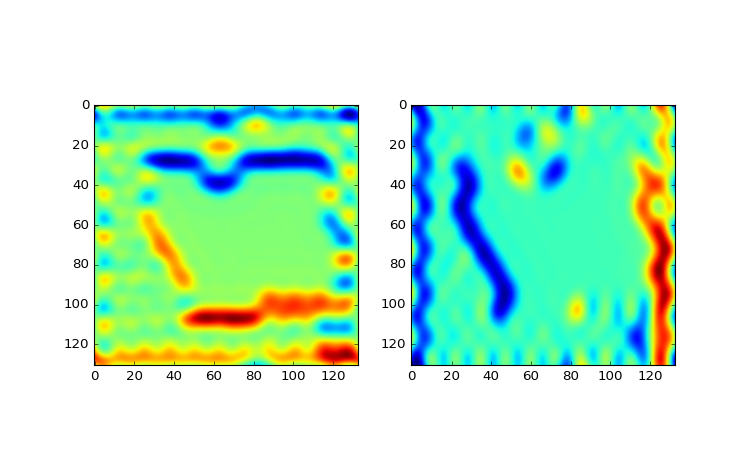

In [32]:
plt.show()

In [13]:
hf['4DSTEM_simulation']['metadata']['metadata_0']['calibration']

<HDF5 group "/4DSTEM_simulation/metadata/metadata_0/calibration" (0 members)>

In [4]:
d.shape

(131, 133, 64, 64)

In [4]:
d = hs.signals.Signal2D(d)

In [5]:
d.plot()

In [6]:
d.sum().plot(cmap = 'viridis')

In [25]:
np.histogram(d_sum.data, bins= 5)

(array([3971,    4,    8,    4,  109]),
 array([2.9441612e-04, 2.9744932e+01, 5.9489571e+01, 8.9234207e+01,
        1.1897884e+02, 1.4872348e+02], dtype=float32))

In [26]:
#measuring Cam Legnth
d_sum = d.sum()
d_sum.plot(vmax = 100*np.histogram(d_sum.data, bins= 5)[1][0], cmap = 'viridis')

In [27]:
circ_roi = hs.roi.CircleROI(20,20,10)

In [28]:
circ_roi.interactive(d_sum)

<Signal2D, title: , dimensions: (|20, 20)>

In [31]:
circ_roi.r

6.50000001

In [35]:
# +g reflection
circ_roi.cx, circ_roi.cy

(32.0, 44.0)

In [36]:
# -g reflection
circ_roi.cx, circ_roi.cy

(32.0, 20.0)

In [37]:
diam = np.sqrt((32-32)**2+(44-20)**2)

In [38]:
rad = diam /2
rad

12.0

In [39]:
# at 80 kV the first reflection is at 19.6 mrad angle:
cal = 19.6 / rad
cal # mrad per pix

1.6333333333333335

In [41]:
# convergence half-angle
circ_roi.r*cal


10.616666683000002

In [42]:
256/64 # single chip Medipix

4.0

In [43]:
55*_ # 55um Medipix pixel size

220.0

In [44]:
# assuming 220 um pixel size (Medipix single chip binned by 4):
L = (rad*220e-6)/(19.6e-3)
L # in meters

0.1346938775510204

In [45]:
#Creating transparent mask
mask = np.ones((64,64))

In [47]:
f = h5py.File(r'/dls/e02/data/2020/cm26481-1/processing/pty_simulated_data_MD/masks/mask_64by64.h5', 'w')

In [48]:
f.create_dataset('mask', data=mask)
f.close()